In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## About Dataset

Context
A startup or start-up is a company or project undertaken by an entrepreneur to seek, develop, and validate a scalable business model. While entrepreneurship includes all new businesses, including self-employment and businesses that do not intend to go public, startups are new businesses that intend to grow large beyond the solo founder. In the beginning, startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential.

Content
The following dataset has data about the Top 300 startups in India. Details about the columns are as follows:

- Company - Name of the Startup.
- City - The City in which the startup is started.
- Starting Year - The Year in which the startup was started.
- Founders - Name of the founders of the startup.
- Industries - Industrial domain in which the startup falls.
- No. of Employees - Number of employees in the startup.
- Funding Amount in USD - Total funding amount funded to the startup.
- Funding Rounds - Funding rounds are the number of times a startup goes back to the market to raise more capital. The goal of every round is for founders to trade equity in their business for the capital they can utilize to advance their companies to the next level.
- No. of Investors - Number of investors in the startup.

<h1 style="color: blue; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Indian Startups (EDA) </h1>


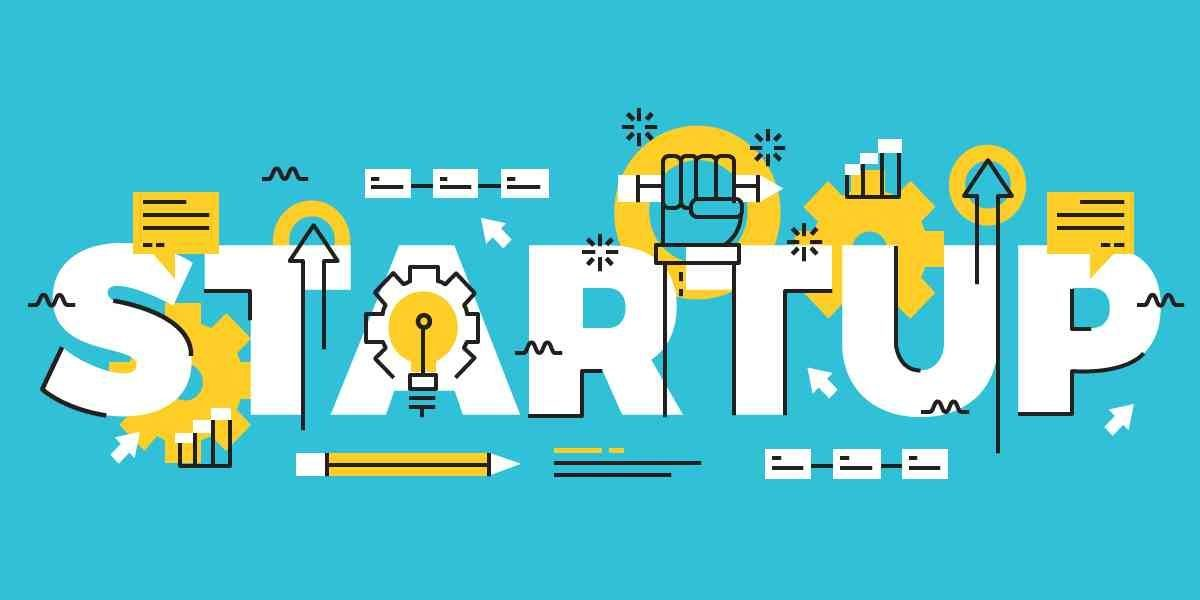

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",rc = {'axes.facecolor': '#FBEAEB'})
pd.options.display.max_columns=50

In [ ]:
# importing data 
df=pd.read_csv("/kaggle/input/indian-startups-top-300/Startups1.csv")
df.sample()

## Workflow
- Understanding of data
- Data cleaning
- Exploratory Data Analysis
- Insights

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Understanding of data </h1>

In [ ]:
# checking rows and columns count
df.shape

> #### There are **300 rows and 11 columns**

In [ ]:
# checking column name 
df.columns

In [ ]:
df.info()

> #### Everything is ok

In [ ]:
# checking null values
df.isnull().sum()

> #### There is **no null values**

In [ ]:
# checking null values in visualization
import missingno as msno 
msno.bar(df,color="red",fontsize=25);

In [ ]:
# checking duplicates
df.duplicated().sum()

> #### No duplicate values are there

In [ ]:
# checking unique values
for i in df.columns:
    print(i,"----------",df[i].unique(),"--------",df[i].nunique())

In [ ]:
df.describe().T

In [ ]:
sns.heatmap(df.corr(),annot=True);

> #### There is **no correlation** between any columns

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Data Cleaning </h1>

In [ ]:
df.sample()

In [ ]:
# Droping column unnamed  and description
df.drop(columns=["Unnamed: 0","Description"],inplace=True)

In [ ]:
df["Industries_type 1"]=df["Industries"].str.split(",",expand=True)[0]

In [ ]:
df["Industries_type 2"]=df["Industries"].str.split(",",expand=True)[1]

In [ ]:
df[df["Industries_type 2"].isnull()]

In [ ]:
## Filling industries 2
l=[29,52,105,134,137,154,189,201,273,277]
for i in l:
    df["Industries_type 2"].iloc[i]="None"

In [ ]:
df["Industries_type 2"].isnull().sum()

In [ ]:
#Creating a column to check how old the company is 
df["age"]=df["Starting Year"].max()-df["Starting Year"]

> ### **Creating a column of Age through feature engineering** to check how old the company is 

In [ ]:
sns.distplot(df["age"]);

In [ ]:
# Dividing the age of the company into 3 segments 
df["age_category"]=pd.cut(df.age,[-1,5,15,np.inf],labels=["new company","old company","older company"])

> ## **Creating a column of Age category through feature engineering** to check which category company belongs is it new, old or older 

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Exploratory data analysis & Insights </h1>

In [ ]:
df.sample()

In [ ]:
## In which year maximum startups are launched
plt.figure(figsize=(16,10))
ax=sns.countplot(x="Starting Year",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('which year maximum startups are launched', fontdict={'fontsize': 28, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=16,
                xytext = (0, 10),
                textcoords = 'offset points')

> ## ➡️ In **2015** maximum startups were born which is **63** 

In [ ]:
## In which city maximum startups are launched
from wordcloud import WordCloud as word
wc = word(background_color='white', width=1000, height=400,colormap="twilight_shifted")
wc.generate_from_frequencies(df["City"].value_counts())
plt.figure(figsize=(10,13),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

>## ➡️ From **Bengaluru** maximum startups were born

In [ ]:
# Which founders were involved in 2 or more startups?
x=df["Founders"].value_counts().sort_values(ascending=False).head(4)
print(x)
color=sns.color_palette("twilight_shifted")
plt.figure(figsize=(7,7))
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={"width":0.5},shadow=True,colors=color,explode=[0,0,0.15,0.15])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.15),ncol=4)
plt.title('Founders with 2 or more startups', fontdict={'fontsize': 28, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

>## ➡️ The Founder with 9 startups name is not available in the data where as             **vivek shekhar sharma has the highest startups with 3**

In [ ]:
# what were the Noc of Employees in the startups
plt.figure(figsize=(18,10))
ax=sns.countplot(x="No. of Employees",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('No of Employees', fontdict={'fontsize': 38, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

>## ➡️ Mostly Startups has between **101-250 of employess**

In [ ]:
# which was the maximum funding round 
plt.figure(figsize=(18,10))
ax=sns.countplot(x="Funding Round",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Funding Rounds', fontdict={'fontsize': 38, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

>## ➡️ 47 Startups has **3 Funding rounds** where as 42 startups has gone to **5 funding rounds**

In [ ]:
# Mostly startups has how many investors
plt.figure(figsize=(18,10))
ax=sns.countplot(x="No. of Investors",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('No. of Investors', fontdict={'fontsize': 38, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

>## ➡️ Mostly startups has **4 and 6 investors**

In [ ]:
# Which were the top 10 Industries_type 1 and Industries_type 2
b=df["Industries_type 1"].value_counts().head(10)
plt.figure(figsize=(18,20),dpi=100)
plt.subplot(2,2,1)
ax=sns.countplot(x="Industries_type 1",data=df,order=b.index,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Top 10 Industries type 1', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

plt.subplot(2,2,2)
c=df["Industries_type 2"].value_counts().head(10)
ay=sns.countplot(x="Industries_type 2",data=df,order=c.index,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Top 10 Industries type 2', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for y in ay.patches:
    ay.annotate(format(y.get_height(), '.0f'),
                (y.get_x() + y.get_width() / 2., y.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')


>## ➡️ Top Industry type is **E-Commerce and Financial Services**

In [ ]:
# how old can the company is which age category they belong
plt.figure(figsize=(25,22),dpi=100)
plt.subplot(2,2,1)
ab= sns.countplot(x="age",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Age', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ab.patches:
    ab.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=15,
                xytext = (0, 10),
                textcoords = 'offset points')


plt.subplot(2,2,2)
ac=sns.countplot(x="age_category",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Age category', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for j in ac.patches:
    ac.annotate(format(j.get_height(), '.0f'),
                (j.get_x() + j.get_width() / 2., j.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')


>## ➡️ Most of the company were **5 years old** and they were **New company**

In [ ]:
## Which is the top company who got the maximum Funding Amount in $
df[df["Funding Amount in $"]==df["Funding Amount in $"].max()]

>## ➡️ **Reliance jio** has got the Maximum Funding 

In [ ]:
# Which are the top 10 companies who got the maximum funding and they were in which City
df.groupby(["Starting Year","Company","City"])["Funding Amount in $"].max().sort_values(ascending=False).to_frame().head(10).style.background_gradient(cmap='twilight_shifted')


>## ➡️ These are the **Top 10 companies** who got the maximum funding and Which city they belongs to

In [ ]:
## Which city startups has got the Highest funding
df.groupby("City")["Funding Amount in $"].sum().sort_values(ascending=False).to_frame().style.background_gradient(cmap='twilight_shifted')


>## ➡️ In **Mumbai** startups has got the highest sum of investment 

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x="Funding Amount in $",y="City",edgecolor="black",estimator=sum,data=df,palette='twilight_shifted');
plt.title('City With Highest funding', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));
    

>## ➡️ In **Mumbai** startups has got the highest sum of investment 

In [ ]:
## Which company has the highest no of employees
df[df["No. of Employees"]=="10001+"][["Company","Funding Amount in $","City","Industries_type 1","No. of Investors"]].sort_values(by="Funding Amount in $",ascending=False).style.background_gradient(cmap='twilight_shifted')

>## ➡️ These are the companies who has the highest **no of employees 10001+**

In [ ]:
df.sample()

In [ ]:
# Which company is the oldest 
df[df["age"]==df["age"].max()]

>## ➡️ **Five Star Business Finance** is the Oldest company which is about 36 year old

In [ ]:
# Which companies are older than 15 years
df[df["age"]>15][["Company","age","age_category"]].sort_values(by="age",ascending=False).style.background_gradient(cmap='twilight_shifted')

>## ➡️ These are the compnaies which are **older than 15 years**

In [ ]:
x=df[df["age"]>15][["Company","age"]].sort_values(by="age",ascending=False)
plt.figure(figsize=(15,13))
sns.barplot(x="age",y="Company",data=x,edgecolor="black",palette='twilight_shifted')
plt.title('Oldest Companies', fontdict={'fontsize': 28, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));



>## ➡️ These are the **Top 10 compnaies which are older than 15 years**

In [ ]:
## What is the minimum, maximum and average fundings, no of investors
df[["Funding Amount in $","No. of Investors","age"]].agg(["mean","min","max"]).style.background_gradient(cmap='twilight_shifted')

In [ ]:
# which company is with the zero funding amount 
df[df["Funding Amount in $"]== 0]

In [ ]:
# Which comapnies has 15+ funding rounds
df[df["Funding Round"]>15][["Company","Starting Year","Funding Round","Funding Amount in $","Industries_type 1"]].sort_values(by="Funding Round",ascending=False).style.background_gradient(cmap="twilight_shifted")

>## ➡️ Ola has gone to maximum funding rounds which is **25** and raised about **38,08,672,049** fundings

In [ ]:
df[df["No. of Investors"]>25][["Company","Starting Year","No. of Investors","Industries_type 1"]].sort_values(by="No. of Investors",ascending=False).style.background_gradient(cmap="twilight_shifted")

>## ➡️ **Ola** has highest no of investors which is **45** starting year from 2010 and raised about **38,08,672,049** fundings where as **byju's** also have a good amount of investors which is **38**

In [ ]:
df.to_csv("startups.csv")

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Analysis Finished </h1>

<h1 style="color: red; text-align:center; padding: 10px; font-family:cursive; font-size: 48px;">If You Like it please do upvote📌 & Comment💬</h1>